In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

In [2]:
ydf = pd.read_csv('./data/yhat_full.csv', sep='|')

In [5]:
#top ten duplicated
np.sum(ydf.sort_values(by='dup_count', ascending=False).iloc[:10].dup_count)

362611

In [3]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(ydf.text)

In [5]:
n = tfidf_matrix.shape[0]
print(n)

246547
<class 'scipy.sparse.csr.csr_matrix'>


In [67]:
import numpy as np
z = np.linspace(0,n,512).astype(int)

In [68]:
%%timeit
i = 1
thr = 0.95
c = cosine_similarity(tfidf_matrix[z[i-1]:z[i]], tfidf_matrix)
np.fill_diagonal(c, 0)
mask = np.max(c, axis=1)<=thr

7.4 s ± 92.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [168]:
c = cosine_similarity(tfidf_matrix[0], tfidf_matrix).flatten()

In [199]:
def cs_thresholding(tfmat, bi, ei):
    c = cosine_similarity(tfmat[bi:ei], tfmat)
    c[c==1] = 0
    mask_array = []
    for thr in np.arange(100):
        mask = np.max(c, axis=1)<=thr/100
        mask_array.append(mask)
    return(mask_array)

In [200]:
m = [cs_thresholding(tfidf_matrix, z[i-1],z[i]) for i in tqdm(range(1,len(z)))]
#m[minibatch num][threshold number][batch values]







  0%|          | 0/511 [00:00<?, ?it/s]





  0%|          | 1/511 [00:13<1:54:55, 13.52s/it]





  0%|          | 2/511 [00:26<1:53:31, 13.38s/it]





  1%|          | 3/511 [00:39<1:51:13, 13.14s/it]





  1%|          | 4/511 [00:51<1:48:00, 12.78s/it]





  1%|          | 5/511 [01:03<1:46:24, 12.62s/it]





  1%|          | 6/511 [01:15<1:45:32, 12.54s/it]





  1%|▏         | 7/511 [01:28<1:46:00, 12.62s/it]





  2%|▏         | 8/511 [01:41<1:45:56, 12.64s/it]





  2%|▏         | 9/511 [01:53<1:44:52, 12.53s/it]





  2%|▏         | 10/511 [02:05<1:44:23, 12.50s/it]





  2%|▏         | 11/511 [02:18<1:44:10, 12.50s/it]





  2%|▏         | 12/511 [02:30<1:43:36, 12.46s/it]





  3%|▎         | 13/511 [02:45<1:50:16, 13.29s/it]





  3%|▎         | 14/511 [02:59<1:50:36, 13.35s/it]





  3%|▎         | 15/511 [03:12<1:49:28, 13.24s/it]





  3%|▎         | 16/511 [03:25<1:48:23, 13.14s/it]





  3%|▎         | 17/511 [03:38<1:48:06, 13.13s/it]





  4%|▎

 43%|████▎     | 219/511 [49:27<1:07:33, 13.88s/it]





 43%|████▎     | 220/511 [49:41<1:08:00, 14.02s/it]





 43%|████▎     | 221/511 [49:57<1:09:21, 14.35s/it]





 43%|████▎     | 222/511 [50:11<1:09:21, 14.40s/it]





 44%|████▎     | 223/511 [50:25<1:09:06, 14.40s/it]





 44%|████▍     | 224/511 [50:40<1:09:34, 14.54s/it]





 44%|████▍     | 225/511 [50:55<1:09:00, 14.48s/it]





 44%|████▍     | 226/511 [51:09<1:09:01, 14.53s/it]





 44%|████▍     | 227/511 [51:25<1:10:43, 14.94s/it]





 45%|████▍     | 228/511 [51:41<1:12:19, 15.33s/it]





 45%|████▍     | 229/511 [51:56<1:11:13, 15.15s/it]





 45%|████▌     | 230/511 [52:09<1:08:01, 14.52s/it]





 45%|████▌     | 231/511 [52:27<1:12:55, 15.63s/it]





 45%|████▌     | 232/511 [52:45<1:15:06, 16.15s/it]





 46%|████▌     | 233/511 [53:02<1:16:51, 16.59s/it]





 46%|████▌     | 234/511 [53:18<1:15:47, 16.42s/it]





 46%|████▌     | 235/511 [53:39<1:21:34, 17.73s/it]





 46%|████▌     | 236/511 [53:58

 85%|████████▌ | 436/511 [1:47:14<20:05, 16.07s/it]





 86%|████████▌ | 437/511 [1:47:29<19:29, 15.81s/it]





 86%|████████▌ | 438/511 [1:47:45<19:03, 15.66s/it]





 86%|████████▌ | 439/511 [1:47:59<18:11, 15.16s/it]





 86%|████████▌ | 440/511 [1:48:13<17:40, 14.94s/it]





 86%|████████▋ | 441/511 [1:48:28<17:26, 14.95s/it]





 86%|████████▋ | 442/511 [1:48:43<17:18, 15.05s/it]





 87%|████████▋ | 443/511 [1:48:59<17:08, 15.13s/it]





 87%|████████▋ | 444/511 [1:49:14<16:46, 15.02s/it]





 87%|████████▋ | 445/511 [1:49:28<16:19, 14.85s/it]





 87%|████████▋ | 446/511 [1:49:43<15:59, 14.76s/it]





 87%|████████▋ | 447/511 [1:49:57<15:43, 14.74s/it]





 88%|████████▊ | 448/511 [1:50:12<15:29, 14.75s/it]





 88%|████████▊ | 449/511 [1:50:27<15:25, 14.93s/it]





 88%|████████▊ | 450/511 [1:50:43<15:25, 15.17s/it]





 88%|████████▊ | 451/511 [1:50:59<15:18, 15.31s/it]





 88%|████████▊ | 452/511 [1:51:14<15:07, 15.38s/it]





 89%|████████▊ | 453/511 [1:51:

In [201]:
cs = []
for t in range(100):
    cs.append(np.array([j for i in m for j in i[t]]))
np.save('./data/npy/cs.npy', cs)

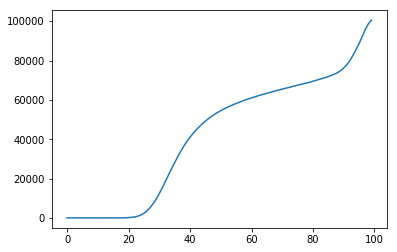

In [233]:
f = [len(ydf[x]) for x in cs]
plt.plot(f)

In [232]:
senti = ydf[cs[95]].pred_sentiment

(-1.4355371269120072, 1.42505059492276, -1.133656090501733, 1.0780857990288808)

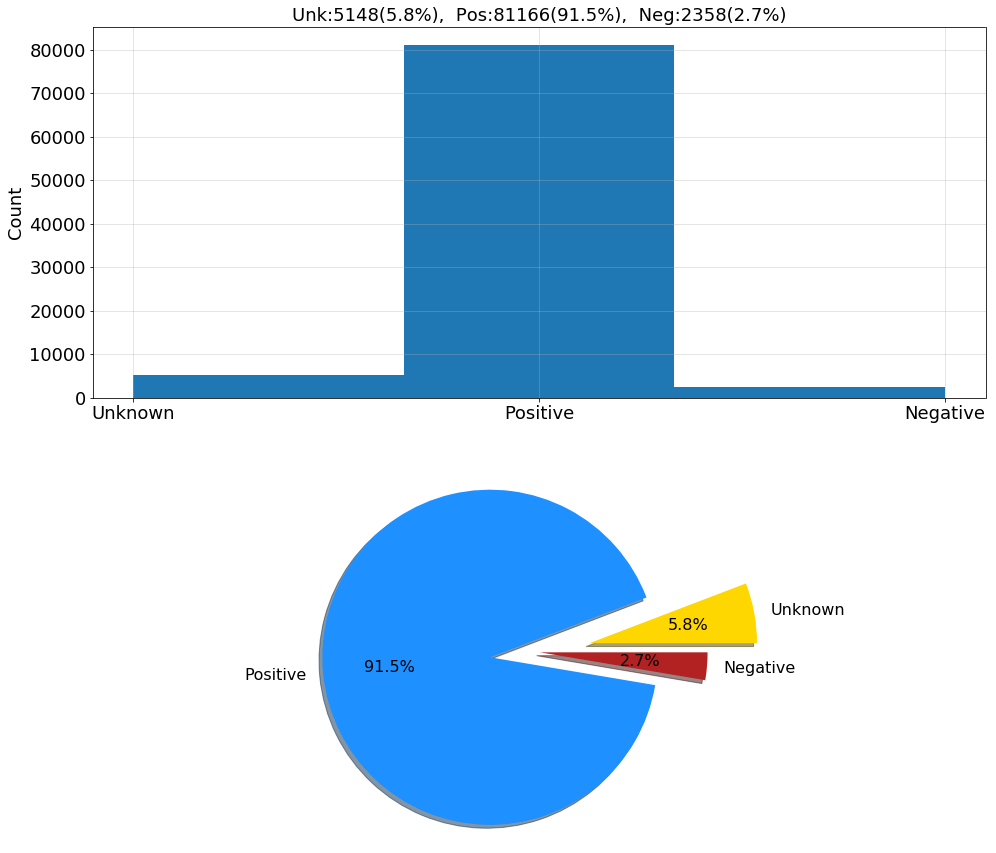

In [231]:
nd_lcs = [np.sum(ydf[cs[95]].pred_sentiment==i) for i in range(3)]
nd_lcp = np.array(nd_lcs)/np.sum(nd_lcs)*100

f, ax = plt.subplots(2,1,figsize=(16,15))
ax[0].hist(senti,bins=3)
ax[0].grid(alpha=0.5)
ax[0].set_title('Unk:%i(%0.1f%%),  Pos:%i(%0.1f%%),  Neg:%i(%0.1f%%)'\
                %(nd_lcs[0],nd_lcp[0],nd_lcs[1],\
                  nd_lcp[1],nd_lcs[2],nd_lcp[2]), fontsize=18)
ax[0].grid(alpha=0.4)
ax[0].set_xticks(np.arange(3))
ax[0].set_xticklabels(['Unknown', 'Positive', 'Negative'], fontsize=18)
ax[0].set_xlabel('')
ax[0].set_ylabel('Count', fontsize=18)
ax[0].tick_params(axis='both', labelsize=18)
labels = ['Unknown', 'Positive', 'Negative']
nd_sizes = nd_lcp
explode = (0.3, 0.3, 0)
colors = ['gold', 'dodgerblue', 'firebrick']
ax[1].pie(nd_sizes, colors=colors, explode=explode, \
          labels=labels, autopct='%1.1f%%', shadow=True,\
          textprops={'fontsize':16})
ax[1].axis('equal')

In [239]:
nd = [np.sum(ydf.pred_sentiment==i) for i in range(3)]

In [242]:
np.sum(np.array(nd) - nd_lcs)

157875

In [243]:
np.sum(np.array(nd_lcs))

88672